In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Loading California Housing Data

In [35]:
# from google.colab import files
# files.upload()

In [36]:
file_path = "housing.csv"

In [37]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [38]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [39]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Independent Variable in the dataset**: latitude, longitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, ocean_proximity.

**Dependent Variable in the dataset**: median_house_value

In [41]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Identifyin and removing missing values from the dataset

In [42]:
#check for missing values
missing_values = data.isnull().sum()

#calculate the percentage of the missing data in each column
missing_percentage = (missing_values / len(data)) * 100

#display the missing data statistics
print("Missing values in each column:\n", missing_values)
print("\n Percentage of missing data:\n", missing_percentage)

Missing values in each column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

 Percentage of missing data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


As the percentage of missing data for total bedrooms is really very less(lesss than 10%), we can just drop the observations that have missing data.

But if percentage of the missing data was very high (more than 20%), we could use SimpleImputer and replace the missing data with median values or mean values.

In [43]:
#drop the rows with missing values
data_cleaned = data.dropna()

#verify that missing values have been removed
print("\n Missing values is each column after removal:")
print(data_cleaned.isnull().sum())


 Missing values is each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# Data Exploration and Visualization

In [44]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [45]:
data_cleaned.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


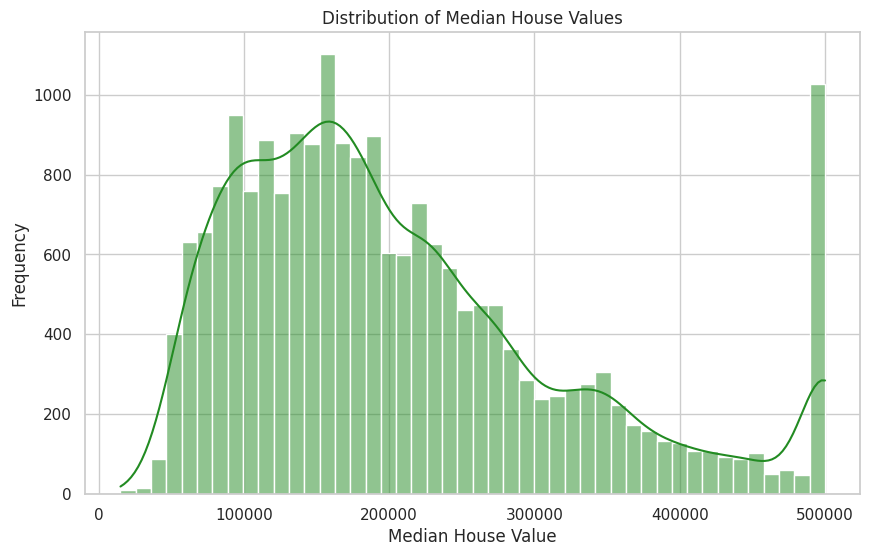

In [46]:
# visualize the data
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned["median_house_value"], color="forestgreen", kde=True)
plt.title("Distribution of Median House Values")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Using InterQualtile Range to Remove Outliers

In [54]:
#getting the the IQR between 0.25 percentile and 0.75 of the median_house_value
Q1 = data_cleaned["median_house_value"].quantile(0.25)
print(Q1)
Q3 = data_cleaned["median_house_value"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1

#defilne the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove te outliers
data_no_outliers_1 = data_cleaned[(data_cleaned["median_house_value"] >= lower_bound) & (data_cleaned["median_house_value"] <= upper_bound)]


#check the shape of the data before and after the removal of outliers
print("Original data shape: ",data_cleaned.shape)
print("New data without outliers shape: ", data_no_outliers_1.shape)

119500.0
264700.0
Original data shape:  (20433, 10)
New data without outliers shape:  (19369, 10)


# BoxBlot for removing outliers

## Outliers in median_income

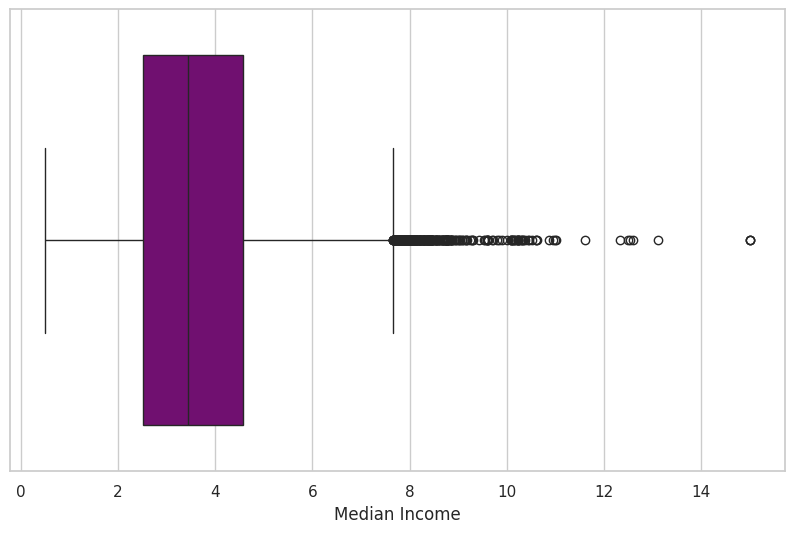

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1["median_income"],color="purple")
plt.xlabel("Median Income")
plt.show()

In [57]:
#calculate Q1 and Q3 for median income
Q1 = data_no_outliers_1["median_income"].quantile(0.25)
Q3 = data_no_outliers_1["median_income"].quantile(0.75)
IQR = Q3 - Q1

#Define the bounds for the outliers. (upper_bound and lower_bound)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove the outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1["median_income"] >= lower_bound) & (data_no_outliers_1["median_income"] <= upper_bound)]

#check the shape of the data before and after the removal of outliers
print("Original data shape: ",data_no_outliers_1.shape)
print("New data without outliers shape: ", data_no_outliers_2.shape)

Original data shape:  (19369, 10)
New data without outliers shape:  (19026, 10)


In [58]:
data = data_no_outliers_2

In [59]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Correlation Analysis

## Correlation Heatmap

<ipython-input-60-dec2dbfa2682>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="Greens")


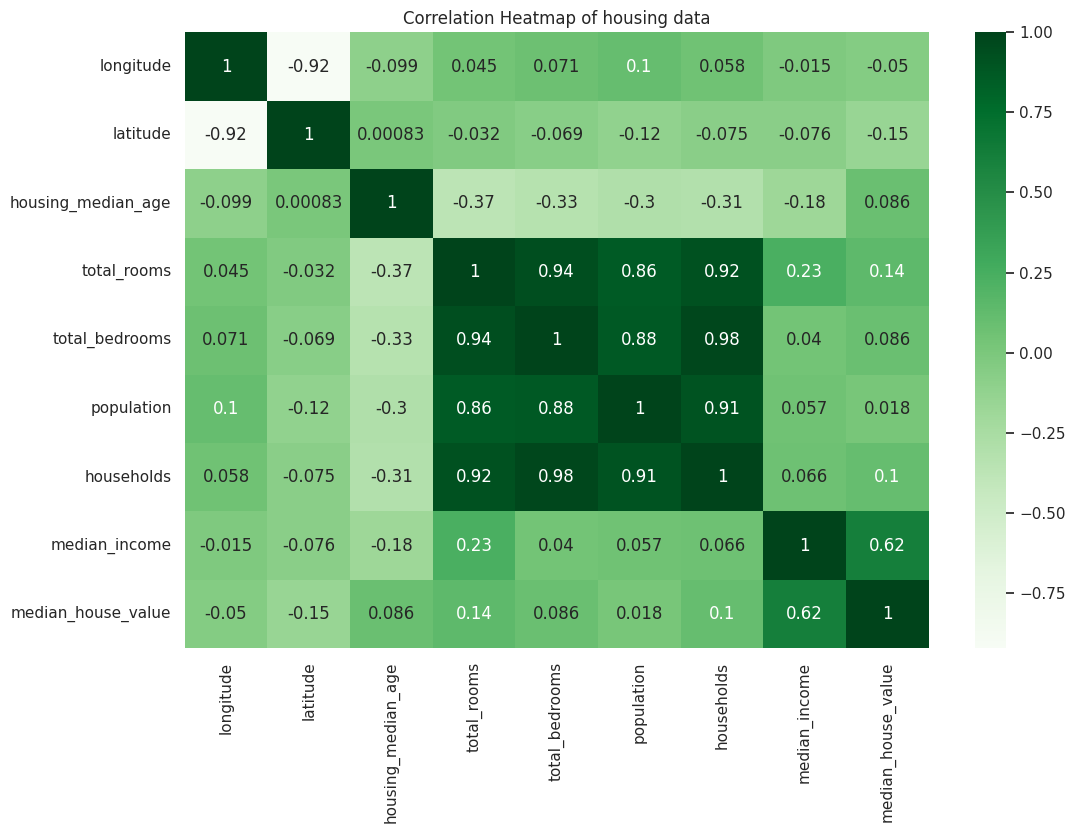

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap="Greens")
plt.title("Correlation Heatmap of housing data")
plt.show()

In [61]:
#dropping total_bedrooms column from the dataset as it is strong correlated to total_rooms, households and ets but it does not have much impact on our depenedent variable median_house_value
data = data.drop("total_bedrooms", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

# String Data Categorization to Dummy Variables

In [62]:
ocean_proximity_dummies = pd.get_dummies(data["ocean_proximity"], prefix="ocean_proximity")
data = pd.concat([data.drop("ocean_proximity", axis = 1), ocean_proximity_dummies], axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [63]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [68]:
data = data.drop("ocean_proximity_ISLAND", axis = 1)

In [69]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


In [70]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

# Splitting Data to Train and Test

In [72]:
# define the features (independent variables) and target (dependent variable)
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]

X

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,741.0,349.0,1.8672,84700.0,0,1,0,0


In [73]:
y

,median_house_value
2,352100.0
3,341300.0
4,342200.0
5,269700.0
6,299200.0
...,...
20635,78100.0
20636,77100.0
20637,92300.0
20638,84700.0


In [77]:
# Split the data into training set and test set.
# test_size specifies the proportion of the data to be included in the test split
# random state ensures reproductibility of your split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# check the size of splits
print(f"Training set size {X_train.shape[0]} samples")
print(f"Test set size {X_test.shape[0]} samples")

Training set size 15220 samples
Test set size 3806 samples


# Training and Testing Linear Regression Model

## Linear Regression using Statsmodels.api

In [79]:
X_train_const = sm.add_constant(X_train) #calculating the beta for each row

#Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

#print summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.015e+32
Date:                Fri, 08 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:55:10   Log-Likelihood:             3.1084e+05
No. Observations:               15220   AIC:                        -6.216e+05
Df Residuals:                   15207   BIC:                        -6.215e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

# Prediction/Testing

In [80]:
X_test_const = sm.add_constant(X_test)

# make predictions on the test set
test_predictions = model_fitted.predict(X_test_const)

In [81]:
test_predictions

2248     121200.0
20302    305800.0
1022     117600.0
337       84200.0
9097     156700.0
           ...   
1791      37900.0
9248      96500.0
16302    152400.0
4519     125000.0
5523     316000.0
Length: 3806, dtype: float64

# Checking OLS Assumptions

## Assumption 1: Linearity

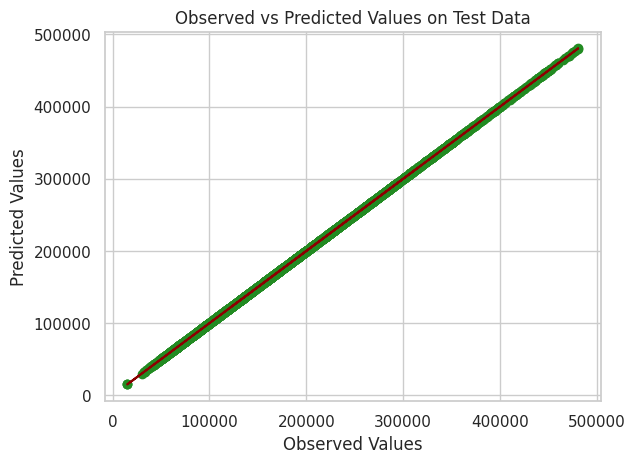

In [82]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values)
plt.show()

**Positive Linear Relationship**: The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

## Assumption2: Random Sample

In [83]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

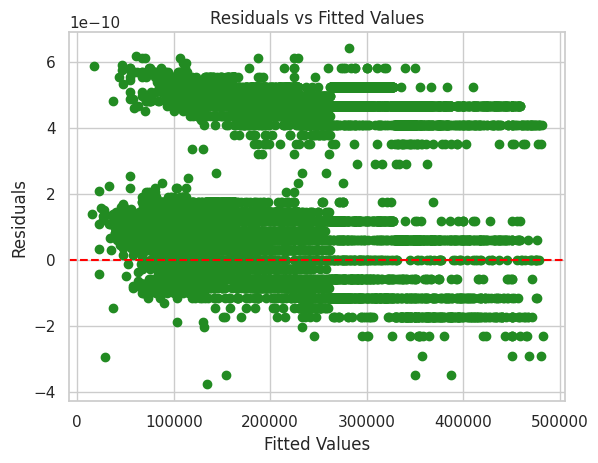

In [84]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

## Assumtion 3: Exogeneity

In [85]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: 0.31
Correlation between residuals and latitude: -0.41
Correlation between residuals and housing_median_age: 0.11
Correlation between residuals and total_rooms: -0.09
Correlation between residuals and population: 0.0
Correlation between residuals and households: -0.02
Correlation between residuals and median_income: 0.09
Correlation between residuals and median_house_value: 0.15
Correlation between residuals and ocean_proximity_<1H OCEAN: 0.95
Correlation between residuals and ocean_proximity_INLAND: -0.52
Correlation between residuals and ocean_proximity_NEAR BAY: -0.17
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.53


**Durbin-Wu-Hausman Test:**
For a more formal statistical test, use the **Durbin-Wu-Hausman** test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

## Assumtion 4: Homoskedasticty

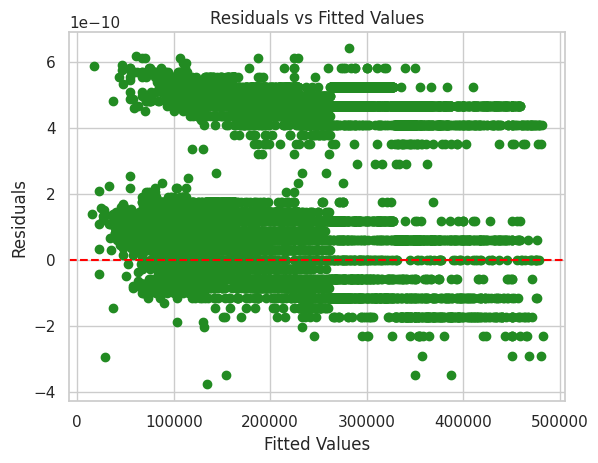

In [86]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Random Scatter:** If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

**Pattern or Shape:** If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.


# Train/Test/Evaluation with Sklearn


## Scaling the data

In [87]:
from sklearn.preprocessing import StandardScaler

#initialize the StandardScaler
scaler = StandardScaler()

#fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

#apply the same transformation on the test data
X_test_scaled = scaler.transform(X_test)

## Prediction and testing

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

#make predictions and the scaled test data
y_pred = lr.predict(X_test_scaled)

#calculate the MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

#Output the performane metric
print(f"MSE on Test set: {mse}")
print(f"RMSE on Test set: {rmse}")

MSE on Test set: 4.595532077270326e-21
RMSE on Test set: 6.779035386594707e-11
